In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [3]:
data = pd.read_csv('/Users/Newton/Pictures/Instagram data.csv' , encoding = 'latin1')
data

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follows  \
0           9       5    162              35        2   
1           7      14    224              48       10   
2          11       1    131              62       12   
3          10       7    213              23        8   
4           5       4    123               8        0   
..        ...     ...    ...             ...      ...   
114         2      38    373              73       80   
115         4       1    148              20       18   
116         0       1     92              34       10   
117         2      75    549             148      214   
118         5      26    443             611      228   

                                               Caption  \
0    Here are some of the most important data visua...   
1    Here are some of the best data science project...   
2    Learn how to train a machine learning model an...   
3    Heres how you can write a Python program to d...   
4    Plotting annotations while visualizing your da...   
..                                                 ...   
114  Here are some of the best data science certifi...   
115  Clustering is a machine learning technique use...   
116  Clustering music genres is a task of grouping ...   
117  Here are some of the best data science certifi...   
118  175 Python Projects with Source Code solved an...   

                                              Hashtags  
0    #finance #money #business #investing #investme...  
1    #healthcare #health #covid #data #datascience ...  
2    #data #datascience #dataanalysis #dataanalytic...  
3    #python #pythonprogramming #pythonprojects #py...  
4    #datavisualization #datascience #data #dataana...  
..                                                 ...  
114  #datascience #datasciencejobs #datasciencetrai...  
115  #machinelearning #machinelearningalgorithms #d...  
116  #machinelearning #machinelearningalgorithms #d...  
117  #datascience #datasciencejobs #datasciencetrai...  
118  #python #pythonprogramming #pythonprojects #py...  

[119 rows x 13 columns]

In [4]:
data

Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shares  Likes  Profile Visits  Follows  \
0           9       5    162              35        2   
1           7      14    224              48       10   
2          11       1    131              62       12   
3          10       7    213              23        8   
4           5       4    123               8        0   
..        ...     ...    ...             ...      ...   
114         2      38    373              73       80   
115         4       1    148              20       18   
116         0       1     92              34       10   
117         2      75    549             148      214   
118         5      26    443             611      228   

                                               Caption  \
0    Here are some of the most important data visua...   
1    Here are some of the best data science project...   
2    Learn how to train a machine learning model an...   
3    Heres how you can write a Python program to d...   
4    Plotting annotations while visualizing your da...   
..                                                 ...   
114  Here are some of the best data science certifi...   
115  Clustering is a machine learning technique use...   
116  Clustering music genres is a task of grouping ...   
117  Here are some of the best data science certifi...   
118  175 Python Projects with Source Code solved an...   

                                              Hashtags  
0    #finance #money #business #investing #investme...  
1    #healthcare #health #covid #data #datascience ...  
2    #data #datascience #dataanalysis #dataanalytic...  
3    #python #pythonprogramming #pythonprojects #py...  
4    #datavisualization #datascience #data #dataana...  
..                                                 ...  
114  #datascience #datasciencejobs #datasciencetrai...  
115  #machinelearning #machinelearningalgorithms #d...  
116  #machinelearning #machinelearningalgorithms #d...  
117  #datascience #datasciencejobs #datasciencetrai...  
118  #python #pythonprogramming #pythonprojects #py...  

[119 rows x 13 columns]

In [5]:
# Check the dataset for null values
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
# No null values so we proceed with the analysis


In [7]:
# Dropping null values from the dataset

In [8]:
data = data.dropna()

In [9]:
# Check our dataset for insights

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [11]:
# Analyzing instagram Reach

In [12]:
# Checking the columns

In [13]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [14]:
# Analayzing column by column

In [15]:
# Plot the distribution of impressions from home

C:\Users\Newton\AppData\Local\Temp\ipykernel_21524\98803683.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


<Axes: title={'center': 'Distribution of Impressions From Home'}, xlabel='From Home', ylabel='Density'>

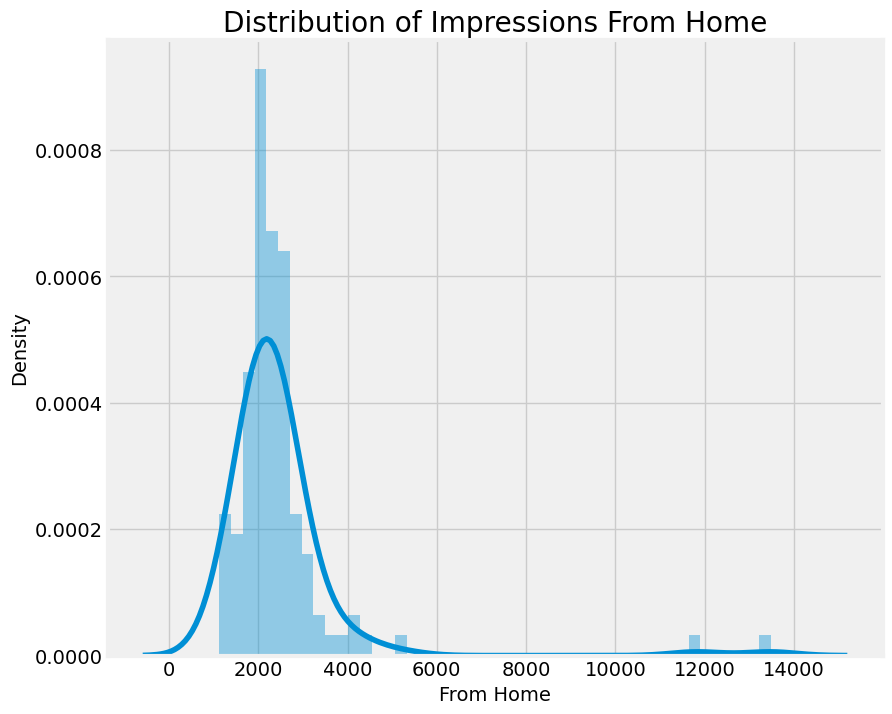

In [16]:
plt.figure(figsize = (10 ,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions From Home')
sns.distplot(data['From Home'])

In [17]:
# 

In [18]:
# From hashtags


C:\Users\Newton\AppData\Local\Temp\ipykernel_21524\912686787.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


<Axes: title={'center': 'Distribution of Impressions From Hashtags'}, xlabel='From Hashtags', ylabel='Density'>

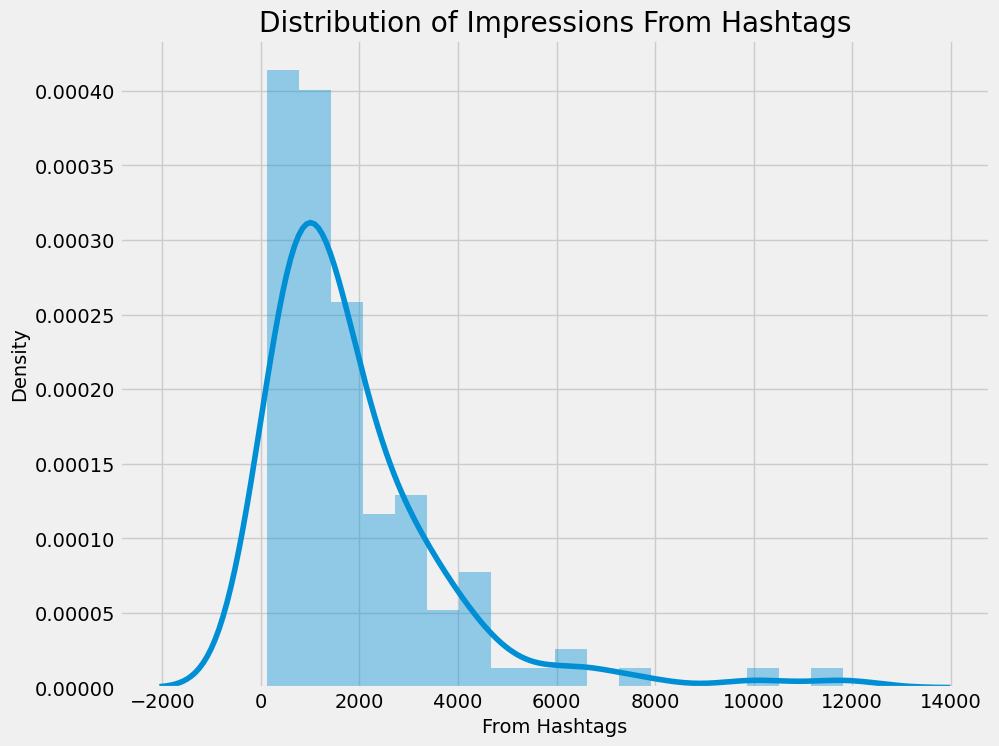

In [19]:
plt.figure(figsize = (10,8))
plt.title('Distribution of Impressions From Hashtags')
sns.distplot(data['From Hashtags'])

In [20]:
# From Explore


C:\Users\Newton\AppData\Local\Temp\ipykernel_21524\2610232579.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


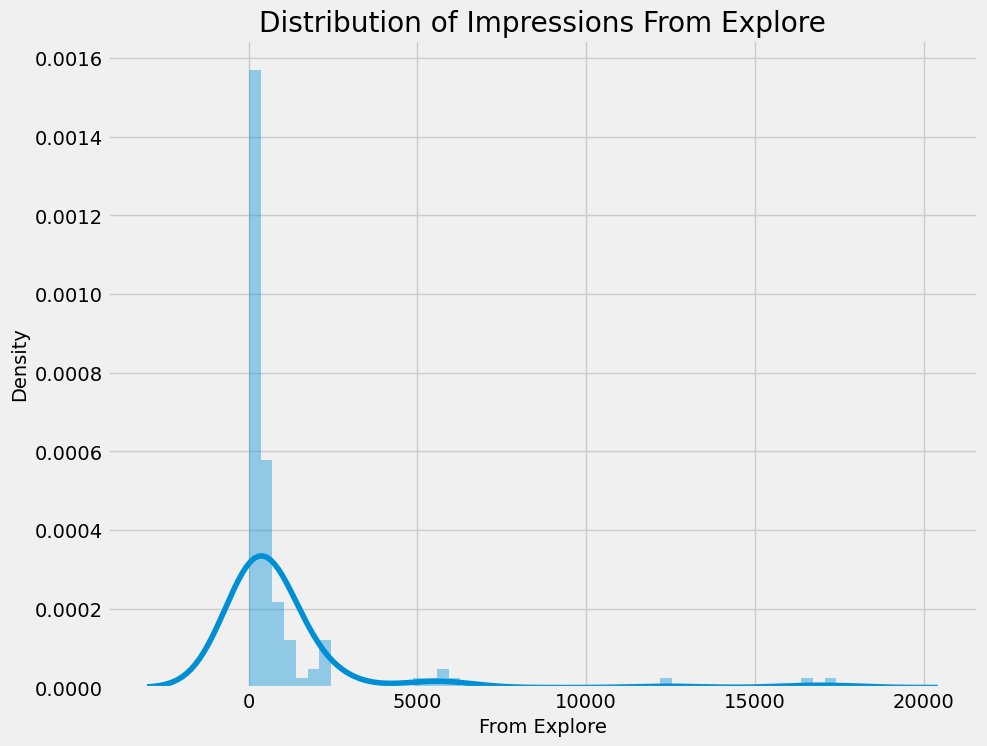

In [21]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [22]:
# From other


C:\Users\Newton\AppData\Local\Temp\ipykernel_21524\2467080511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Other'])


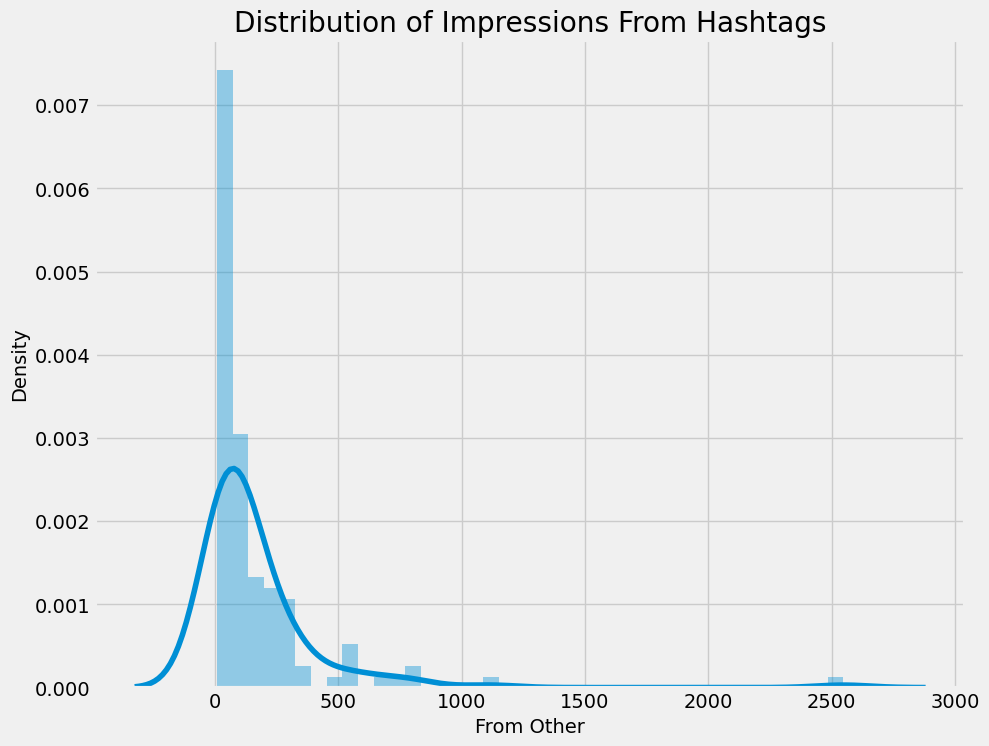

In [23]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Other'])
plt.show()

In [24]:
# Percentage of impressions from various sources

In [25]:
home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

values = [home , hashtags , explore , other]
labels = ['From Home' , 'From Hashtags', 'From Explore' , 'From Other']

px.pie(data , values = values , names = labels , title = 'Impressions on Instagram Posts From Various Sources' , hole = 0.5)

In [26]:
home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()



values = [home , hashtags , explore , other]
labels = ['From Home' , 'From Hashtags', 'From Explore' , 'From Other']



figg = px.pie(data , values = values , names = labels , title = 'Impressions on Instagram Posts From Various Sources' , hole = 0.5)

In [27]:
figg

In [28]:
# Most used used by analyzing captions and hashtags

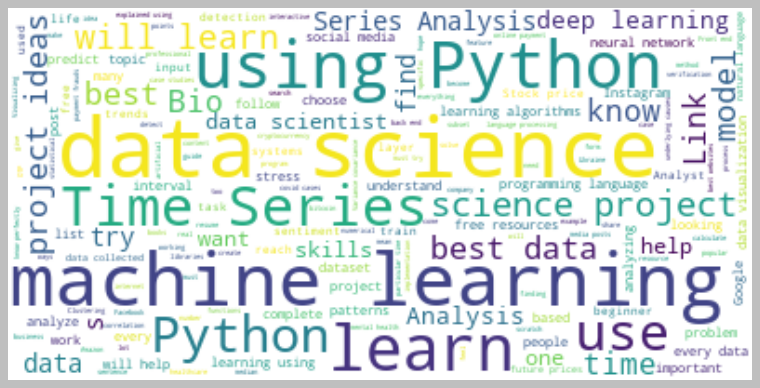

In [29]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Hashtags


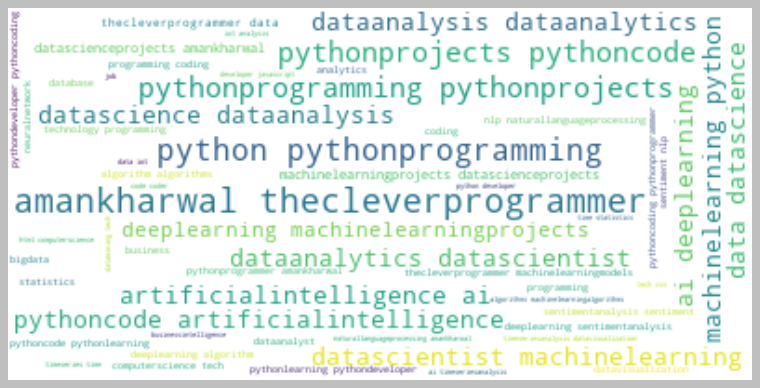

In [31]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
# Analyzing relationships by creating a scatter plot


In [33]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [34]:
figure1 = px.scatter(data_frame = data , x = 'Impressions' , y = 'Likes' , size = 'Likes' , trendline = 'ols' , title = "Relationship Between Likes and Impressions")

In [35]:
figure1.show()

In [36]:
#Scatter plot between impresiions and saves


In [37]:
figure2 = px.scatter(data_frame = data , x = 'Impressions' , y = 'Saves' , size = 'Saves' , trendline = 'ols' , title = 'Relationship Between Post Saves and Total Impressions' )

In [38]:
figure2

In [39]:
# Scatter plot between comments and impressions

In [40]:
figure3 = px.scatter(data_frame = data , x = 'Impressions' , y = 'Comments' , size  = 'Comments' , trendline = 'ols' , title = 'Relationship Between Comments and Total Impressions')

In [41]:
figure3

In [42]:
# Shares and impressions


In [43]:
figure4 = px.scatter( data_frame = data , x = 'Impressions' , y = 'Shares' , size = 'Shares' , trendline = 'ols' , title = 'Relationship Between Shares and Total Impressions' )

In [44]:
figure4

In [45]:
# Correlation

In [46]:
correlation = data.corr()
print(correlation['Impressions'].sort_values(ascending = False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


C:\Users\Newton\AppData\Local\Temp\ipykernel_21524\625004298.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [47]:
# Conversion rate

In [48]:
conversion_rate = (data['Follows'].sum()/data['Profile Visits'].sum()*100)

In [49]:
conversion_rate

41.00265604249668

In [50]:
## 41 pc ,not so bad

In [51]:
# Analayzing using a scatter plot the relationship between profile visits and follows


In [52]:
figure5 = px.scatter(data_frame = data , x = 'Profile Visits' , y = 'Follows' , trendline = 'ols' , title = 'Relationship Between Profile Visits and Followers Gained' )

In [53]:
figure5

In [54]:
# Prediction using machine learning

In [55]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])

In [60]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [65]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
len(x_train)

95

In [68]:
len(x_test)

24

In [69]:
len(x)

119

In [70]:
clf.fit(x_train , y_train)

LinearRegression()

In [71]:
clf.score(x_test , y_test)

0.8845232548761885

In [72]:
## 84 pc accuracy 


In [73]:
feature1 = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])

In [74]:
clf.predict(feature1)


array([10977.12239607])